<h1>Importing Libraries</h1>

In [1]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

In [2]:
import folium

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [5]:
import geocoder

In [6]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from geopy.geocoders import Nominatim

In [9]:
from geopy.extra.rate_limiter import RateLimiter

In [10]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [12]:
from bs4 import BeautifulSoup

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud

In [15]:
#importing file with my credentials information
import credentials as cr

<h1>San Francisco Neighborhoods data </h1>

In [16]:
url = "http://www.healthysf.org/bdi/outcomes/zipmap.htm"

response = requests.get(url)
soup = BeautifulSoup(response.text, "lxml")
table = soup.find_all("table")
sf_neighborhoods = pd.read_html(str(table))
sf_neighborhoods = pd.DataFrame(sf_neighborhoods[4])

In [17]:
sf_neighborhoods

,0,1,2
0,Zip Code,Neighborhood,Population (Census 2000)
1,94102,Hayes Valley/Tenderloin/North of Market,28991
2,94103,South of Market,23016
3,94107,Potrero Hill,17368
4,94108,Chinatown,13716
5,94109,Polk/Russian Hill (Nob Hill),56322
6,94110,Inner Mission/Bernal Heights,74633
7,94112,Ingelside-Excelsior/Crocker-Amazon,73104
8,94114,Castro/Noe Valley,30574
9,94115,Western Addition/Japantown,33115


<h3>Cleaning the datafile</h3>

In [18]:
sf_neighborhoods.columns = sf_neighborhoods.iloc[0]
sf_neighborhoods = sf_neighborhoods[['Zip Code', 'Neighborhood']]
sf_neighborhoods = sf_neighborhoods.drop(sf_neighborhoods.index[0])
sf_neighborhoods.reset_index(drop = True, inplace = True)

In [19]:
sf_neighborhoods = sf_neighborhoods.drop(sf_neighborhoods.index[21])

In [20]:
sf_neighborhoods.head()

,Zip Code,Neighborhood
0,94102,Hayes Valley/Tenderloin/North of Market
1,94103,South of Market
2,94107,Potrero Hill
3,94108,Chinatown
4,94109,Polk/Russian Hill (Nob Hill)


<h3>Adding geo coordinates to the dataframe</h3> 

In [21]:
locator = Nominatim(user_agent='myGeocoder')

In [22]:
location = locator.geocode('San Francisco')

In [23]:
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 37.7790262, Longitude = -122.4199061


In [24]:
sf_neighborhoods.shape[0]

21

In [25]:
latitude = []
longitude = []
for n in range(0, 21):
    zip_code = sf_neighborhoods['Zip Code'][n]
    location = locator.geocode(zip_code)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [26]:
sf_neighborhoods['latitude'] = pd.Series(latitude)
sf_neighborhoods['longitude'] = pd.Series(longitude)

In [27]:
sf_neighborhoods

,Zip Code,Neighborhood,latitude,longitude
0,94102,Hayes Valley/Tenderloin/North of Market,48.511538,38.620331
1,94103,South of Market,37.768063,-122.419700
2,94107,Potrero Hill,37.791436,-122.406974
3,94108,Chinatown,37.791074,-122.406559
4,94109,Polk/Russian Hill (Nob Hill),37.798012,-122.422964
5,94110,Inner Mission/Bernal Heights,37.752172,-122.416104
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.722630,-122.443304
7,94114,Castro/Noe Valley,37.761403,-122.435242
8,94115,Western Addition/Japantown,37.782757,-122.440178
9,94116,Parkside/Forest Hill,48.688171,13.481367


<h3>Checking if all coordinates are correct</h3>

In [28]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)

In [29]:
sf_neighborhoods['location'] = sf_neighborhoods['Zip Code'].apply(geocode)

In [30]:
sf_neighborhoods

,Zip Code,Neighborhood,latitude,longitude,location
0,94102,Hayes Valley/Tenderloin/North of Market,48.511538,38.620331,"(Тополь, Брянка, Брянківська міська рада, Луга..."
1,94103,South of Market,37.768063,-122.419700,"(San Francisco, San Francisco City and County,..."
2,94107,Potrero Hill,37.791436,-122.406974,"(San Francisco, San Francisco City and County,..."
3,94108,Chinatown,37.791074,-122.406559,"(San Francisco, San Francisco City and County,..."
4,94109,Polk/Russian Hill (Nob Hill),37.798012,-122.422964,"(San Francisco, San Francisco City and County,..."
5,94110,Inner Mission/Bernal Heights,37.752172,-122.416104,"(San Francisco, San Francisco City and County,..."
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.722630,-122.443304,"(San Francisco, San Francisco City and County,..."
7,94114,Castro/Noe Valley,37.761403,-122.435242,"(San Francisco, San Francisco City and County,..."
8,94115,Western Addition/Japantown,37.782757,-122.440178,"(San Francisco, San Francisco City and County,..."
9,94116,Parkside/Forest Hill,48.688171,13.481367,"(Lenzingerberg, Hutthurm, Landkreis Passau, Ba..."


<h2> As we see, locations for records under indexes 0 and 9 were recognized incorrectly. We will substitute latitude and longitude recorded by correct data and then drop location column. </h2>

In [31]:
sf_neighborhoods.latitude[0] = 37.7787
sf_neighborhoods.longitude[0] = -122.4212

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
sf_neighborhoods.latitude[9] = 37.7432 
sf_neighborhoods.longitude[9] = -122.4977

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
sf_neighborhoods.drop(columns= 'location', inplace= True)

<h2>Below is our final file with San Francisco neighborhoods</h2>

In [34]:
sf_neighborhoods

,Zip Code,Neighborhood,latitude,longitude
0,94102,Hayes Valley/Tenderloin/North of Market,37.778700,-122.421200
1,94103,South of Market,37.768063,-122.419700
2,94107,Potrero Hill,37.791436,-122.406974
3,94108,Chinatown,37.791074,-122.406559
4,94109,Polk/Russian Hill (Nob Hill),37.798012,-122.422964
5,94110,Inner Mission/Bernal Heights,37.752172,-122.416104
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.722630,-122.443304
7,94114,Castro/Noe Valley,37.761403,-122.435242
8,94115,Western Addition/Japantown,37.782757,-122.440178
9,94116,Parkside/Forest Hill,37.743200,-122.497700


In [35]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [36]:
# create map of San Francisco 
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(sf_neighborhoods['latitude'], sf_neighborhoods['longitude'], sf_neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FA8072',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

<h1>New York neighborhoods data</h1>

Here we will follow the procedure from the Lab and we will also analyse data from Manhattan only

In [37]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [38]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [39]:
neighborhoods_data = newyork_data['features']

In [40]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)

In [41]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [42]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [43]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [44]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [45]:
# create map of Manhattanm, New York 
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Borough'], manhattan_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FA8072',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

<h1>Foursquare API</h1>

In [46]:
CLIENT_ID = cr.CLIENT_ID
CLIENT_SECRET = cr.CLIENT_SECRET
VERSION = cr.VERSION

In [47]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] 
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] 
neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] 

In [48]:
LIMIT = 100 
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


In [49]:
results = requests.get(url).json()

In [50]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<h2>Exploring Manhattan venues</h2>

In [51]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [52]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


<h3>Exploring Manhattan data</h3>

In [53]:
manhattan_venues['Venue Category'].value_counts().head(15)

Coffee Shop             139
Italian Restaurant      129
Café                     86
American Restaurant      77
Pizza Place              76
Bakery                   75
Park                     68
Hotel                    63
Bar                      61
Gym                      57
Gym / Fitness Center     56
Mexican Restaurant       55
Cocktail Bar             55
Chinese Restaurant       49
Sandwich Place           46
Name: Venue Category, dtype: int64

In [54]:
manhattan_venues.shape

(3219, 7)

In [55]:
manhattan_venues.Neighborhood.value_counts()

Greenwich Village      100
Yorkville              100
Chelsea                100
Soho                   100
Turtle Bay             100
Upper East Side        100
Chinatown              100
Lenox Hill             100
East Village           100
West Village           100
Murray Hill            100
Midtown South          100
Noho                   100
Financial District     100
Civic Center           100
Sutton Place           100
Little Italy           100
Midtown                100
Clinton                100
Flatiron               100
Upper West Side         98
Lincoln Square          96
Gramercy                95
Carnegie Hill           90
Tribeca                 88
Washington Heights      86
Tudor City              81
Battery Park City       66
Hamilton Heights        63
Hudson Yards            62
Inwood                  57
Manhattan Valley        49
Lower East Side         48
Manhattanville          47
Central Harlem          45
Morningside Heights     43
East Harlem             40
R

In [56]:
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup P

In [57]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head(5)

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soba Restaurant,Soccer Field,Social Club,Soup P

In [58]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Plaza,Playground,Boat or Ferry,Food Court,Burger Joint
1,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Wine Shop,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Pizza Place,Bookstore
2,Central Harlem,African Restaurant,Chinese Restaurant,Bar,Seafood Restaurant,American Restaurant,French Restaurant,Cosmetics Shop,Caribbean Restaurant,Fried Chicken Joint,Café
3,Chelsea,Coffee Shop,American Restaurant,Art Gallery,Bakery,Ice Cream Shop,Italian Restaurant,French Restaurant,Market,Bookstore,Japanese Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Hotpot Restaurant,Ice Cream Shop,Optical Shop,Noodle House,Salon / Barbershop


<h2>Clustering</h2>

In [60]:
manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

In [61]:
sum_squared_distance = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(manhattan_grouped_clustering)
    sum_squared_distance.append(km.inertia_)

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sum of squared distance')

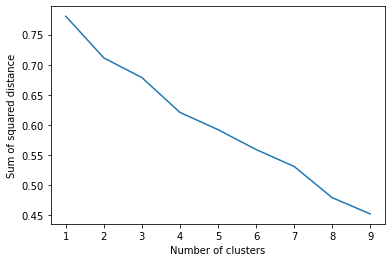

In [63]:
sns.lineplot(x = list_k, y = sum_squared_distance)

plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')

<h3>Based on the Elbow Method, we can see that using 7 clusters will give us an optimal sum of squared distance </h3>
I also tested running clustering for k = 8, however it performed not as well and 7 seems to provide the better representation of city neighborhoods. 

In [64]:
kclusters = 8
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

In [65]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
manhattan_merged = manhattan_data
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Coffee Shop,Gym,Sandwich Place,Discount Store,Pharmacy,Steakhouse,Supplement Shop,Seafood Restaurant,Tennis Stadium,Donut Shop
1,Manhattan,Chinatown,40.715618,-73.994279,7,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Hotpot Restaurant,Ice Cream Shop,Optical Shop,Noodle House,Salon / Barbershop
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Bakery,Grocery Store,Mobile Phone Shop,Spanish Restaurant,Supermarket,Coffee Shop,Park,Bank,Deli / Bodega
3,Manhattan,Inwood,40.867684,-73.921210,1,Mexican Restaurant,Café,Lounge,Restaurant,Frozen Yogurt Shop,Park,Bakery,Chinese Restaurant,Caribbean Restaurant,American Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,1,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,School,Deli / Bodega,Sushi Restaurant,Park,Cocktail Bar


In [66]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h2>Explore the top venues of each cluster</h2>

In [67]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Battery Park City,Park,Hotel,Gym,Coffee Shop,Memorial Site,Plaza,Playground,Boat or Ferry,Food Court,Burger Joint
37,Stuyvesant Town,Park,Fountain,Gym / Fitness Center,Harbor / Marina,Cocktail Bar,Baseball Field,Bar,Bistro,Heliport,Boat or Ferry


In [68]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,Spanish Restaurant,Supermarket,Coffee Shop,Park,Bank,Deli / Bodega
3,Inwood,Mexican Restaurant,Café,Lounge,Restaurant,Frozen Yogurt Shop,Park,Bakery,Chinese Restaurant,Caribbean Restaurant,American Restaurant
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,School,Deli / Bodega,Sushi Restaurant,Park,Cocktail Bar
5,Manhattanville,Seafood Restaurant,Coffee Shop,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Spanish Restaurant,Check Cashing Service,Café,Diner,Japanese Curry Restaurant
36,Tudor City,Park,Café,Mexican Restaurant,Coffee Shop,Deli / Bodega,Diner,Asian Restaurant,Garden,Greek Restaurant,Gym


In [69]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Midtown South,Korean Restaurant,Hotel,Cosmetics Shop,Japanese Restaurant,Bakery,Gym / Fitness Center,Dessert Shop,Coffee Shop,American Restaurant,Café


In [70]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Bakery,Gym / Fitness Center,Spa,French Restaurant,Yoga Studio,Cosmetics Shop,Hotel
9,Yorkville,Italian Restaurant,Gym,Bar,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Diner,Deli / Bodega,Mexican Restaurant,Wine Shop
10,Lenox Hill,Italian Restaurant,Sushi Restaurant,Coffee Shop,Pizza Place,Café,Cocktail Bar,Gym,Gym / Fitness Center,Burger Joint,Gift Shop
12,Upper West Side,Italian Restaurant,Bar,Café,Wine Bar,Indian Restaurant,Bakery,Pizza Place,Coffee Shop,Vegetarian / Vegan Restaurant,Mediterranean Restaurant
13,Lincoln Square,Plaza,Theater,Performing Arts Venue,Concert Hall,Café,Italian Restaurant,Wine Shop,American Restaurant,French Restaurant,Bakery
14,Clinton,Theater,Italian Restaurant,American Restaurant,Gym / Fitness Center,Coffee Shop,Sandwich Place,Gym,Spa,Wine Shop,Hotel
18,Greenwich Village,Italian Restaurant,Clothing Store,Café,Sushi Restaurant,Indian Restaurant,Boutique,Gym,Chinese Restaurant,Burger Joint,French Restaurant
19,East Village,Bar,Ice Cream Shop,Mexican Restaurant,Cocktail Bar,Wine Bar,Pizza Place,Italian Restaurant,Speakeasy,Korean Restaurant,Vegetarian / Vegan Restaurant
21,Tribeca,Park,American Restaurant,Wine Bar,Italian Restaurant,Café,Coffee Shop,Greek Restaurant,Spa,Bar,Basketball Court
24,West Village,Italian Restaurant,American Restaurant,New American Restaurant,Park,Wine Bar,Cocktail Bar,Coffee Shop,Theater,Jazz Club,Pizza Place


In [71]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Gym,Sandwich Place,Discount Store,Pharmacy,Steakhouse,Supplement Shop,Seafood Restaurant,Tennis Stadium,Donut Shop


In [72]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Sandwich Place,Latin American Restaurant,Deli / Bodega,Restaurant,Park,Liquor Store,Taco Place


In [73]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 6, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,African Restaurant,Chinese Restaurant,Bar,Seafood Restaurant,American Restaurant,French Restaurant,Cosmetics Shop,Caribbean Restaurant,Fried Chicken Joint,Café
11,Roosevelt Island,Deli / Bodega,Pizza Place,Liquor Store,Greek Restaurant,Park,Gym,Gym / Fitness Center,Supermarket,Dog Run,Sandwich Place
16,Murray Hill,Sandwich Place,Hotel,Coffee Shop,Japanese Restaurant,American Restaurant,Gym / Fitness Center,Bar,Italian Restaurant,Pizza Place,Restaurant
17,Chelsea,Coffee Shop,American Restaurant,Art Gallery,Bakery,Ice Cream Shop,Italian Restaurant,French Restaurant,Market,Bookstore,Japanese Restaurant
25,Manhattan Valley,Coffee Shop,Bar,Yoga Studio,Thai Restaurant,Playground,Pizza Place,Mexican Restaurant,Ethiopian Restaurant,Café,Caribbean Restaurant
26,Morningside Heights,Park,Coffee Shop,Bookstore,American Restaurant,Burger Joint,Deli / Bodega,Tennis Court,Outdoor Sculpture,Frozen Yogurt Shop,Optical Shop
29,Financial District,Coffee Shop,Hotel,Bar,Park,Pizza Place,Cocktail Bar,Gym,Café,Salad Place,Japanese Restaurant
30,Carnegie Hill,Coffee Shop,Café,Yoga Studio,Wine Shop,Italian Restaurant,Gym / Fitness Center,Gym,French Restaurant,Pizza Place,Bookstore
32,Civic Center,Gym / Fitness Center,Coffee Shop,Spa,Cocktail Bar,French Restaurant,Hotel,Sushi Restaurant,Sandwich Place,Italian Restaurant,Bakery


In [74]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 7, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Hotpot Restaurant,Ice Cream Shop,Optical Shop,Noodle House,Salon / Barbershop
15,Midtown,Hotel,Clothing Store,Sporting Goods Shop,Theater,Bakery,Steakhouse,Coffee Shop,Sandwich Place,Sushi Restaurant,Pizza Place
20,Lower East Side,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Pharmacy,Pizza Place,Bakery,Café,Ramen Restaurant,Art Gallery,Cocktail Bar
22,Little Italy,Bakery,Café,Chinese Restaurant,Italian Restaurant,Coffee Shop,Mediterranean Restaurant,Cocktail Bar,Salon / Barbershop,Sandwich Place,Pizza Place
23,Soho,Clothing Store,Italian Restaurant,Coffee Shop,Boutique,Shoe Store,Bakery,Café,Mediterranean Restaurant,Sporting Goods Shop,Pizza Place


<h1>San Francisco venues and clustering</h1>

In [75]:
sf_latitude = sf_neighborhoods.loc[0, 'latitude'] 
sf_longitude = sf_neighborhoods.loc[0, 'longitude'] 
sf_name = sf_neighborhoods.loc[0, 'Neighborhood'] 

In [76]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500
sf_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    sf_latitude, 
    sf_longitude, 
    radius, 
    LIMIT)

In [77]:
sf_results = requests.get(sf_url).json()

In [78]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [79]:
sf_venues = sf_results['response']['groups'][0]['items']
    
sf_nearby_venues = json_normalize(sf_venues) 


sf_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
sf_nearby_venues = sf_nearby_venues.loc[:, sf_filtered_columns]

sf_nearby_venues['venue.categories'] = sf_nearby_venues.apply(get_category_type, axis=1)

# clean columns
sf_nearby_venues.columns = [col.split(".")[-1] for col in sf_nearby_venues.columns]

sf_nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Louise M. Davies Symphony Hall,Concert Hall,37.777976,-122.420157
1,War Memorial Opera House,Opera House,37.778601,-122.420816
2,Herbst Theater,Concert Hall,37.779548,-122.420953
3,MAC Modern Appealing Clothing,Boutique,37.777785,-122.422852
4,Maker & Moss,Furniture / Home Store,37.777144,-122.422368


In [80]:
sf_venues = getNearbyVenues(names=sf_neighborhoods['Neighborhood'],
                                   latitudes=sf_neighborhoods['latitude'],
                                   longitudes=sf_neighborhoods['longitude']
                                  )

Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


In [81]:
sf_venues.groupby('Neighborhood', as_index = False).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayview-Hunters Point,5,5,5,5,5,5
1,Castro/Noe Valley,100,100,100,100,100,100
2,Chinatown,91,91,91,91,91,91
3,Haight-Ashbury,26,26,26,26,26,26
4,Hayes Valley/Tenderloin/North of Market,100,100,100,100,100,100
5,Ingelside-Excelsior/Crocker-Amazon,13,13,13,13,13,13
6,Inner Mission/Bernal Heights,80,80,80,80,80,80
7,Inner Richmond,45,45,45,45,45,45
8,Lake Merced,12,12,12,12,12,12
9,Marina,36,36,36,36,36,36


In [82]:
sf_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of Market,37.7787,-122.4212,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
1,Hayes Valley/Tenderloin/North of Market,37.7787,-122.4212,War Memorial Opera House,37.778601,-122.420816,Opera House
2,Hayes Valley/Tenderloin/North of Market,37.7787,-122.4212,Herbst Theater,37.779548,-122.420953,Concert Hall
3,Hayes Valley/Tenderloin/North of Market,37.7787,-122.4212,MAC Modern Appealing Clothing,37.777785,-122.422852,Boutique
4,Hayes Valley/Tenderloin/North of Market,37.7787,-122.4212,Maker & Moss,37.777144,-122.422368,Furniture / Home Store


In [83]:
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
sf_fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[sf_fixed_columns]

sf_onehot.head()

,Yoga Studio,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Road,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Sicilian Restaurant,Skating Rink,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [84]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Beer Store,Bike Shop,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Camera Store,Candy Store,Cantonese Restaurant,Car Wash,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish Market,Flower Shop,Food & Drink Shop,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Herbs & Spices Store,Hill,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Museum,Music School,Music Store,Music Venue,Nabe Restaurant,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Road,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Sicilian Restaurant,Skating Rink,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Trail,Tuscan Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,

In [85]:
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sf_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
sf_neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    sf_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

sf_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Breakfast Spot,Park,Mountain,Scenic Lookout,Light Rail Station,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant
1,Castro/Noe Valley,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Yoga Studio,Seafood Restaurant,Gym / Fitness Center,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant
2,Chinatown,Hotel,Coffee Shop,Clothing Store,Boutique,Jewelry Store,Sushi Restaurant,French Restaurant,Lounge,Men's Store,Electronics Store
3,Haight-Ashbury,Café,Coffee Shop,Bank,Salon / Barbershop,Supermarket,Massage Studio,Mexican Restaurant,Middle Eastern Restaurant,Deli / Bodega,Yoga Studio
4,Hayes Valley/Tenderloin/North of Market,Sushi Restaurant,Wine Bar,Coffee Shop,Boutique,French Restaurant,Cocktail Bar,Clothing Store,Optical Shop,Pizza Place,Dessert Shop


<h2> SF Clustering </h2>

First, determine the optimal number of clusters:

In [86]:
sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

In [87]:
sf_sum_squared_distance = []
list_k = list(range(1, 10))
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(sf_grouped_clustering)
    sf_sum_squared_distance.append(km.inertia_)

Text(0, 0.5, 'Sum of squared distance')

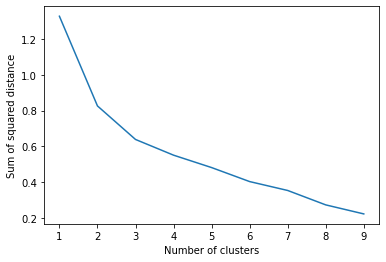

In [88]:
sns.lineplot(x = list_k, y = sf_sum_squared_distance)

plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distance')

Based on the graph, 3 will be an optimal number of clusters.

In [89]:
kclusters = 3
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

In [90]:
sf_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
sf_merged = sf_neighborhoods
sf_merged = sf_merged.join(sf_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head()

,Zip Code,Neighborhood,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,37.778700,-122.421200,0,Sushi Restaurant,Wine Bar,Coffee Shop,Boutique,French Restaurant,Cocktail Bar,Clothing Store,Optical Shop,Pizza Place,Dessert Shop
1,94103,South of Market,37.768063,-122.419700,0,Mexican Restaurant,Pizza Place,Coffee Shop,Rental Car Location,Tapas Restaurant,Spa,Yoga Studio,Gym / Fitness Center,Pakistani Restaurant,Mediterranean Restaurant
2,94107,Potrero Hill,37.791436,-122.406974,0,Hotel,Coffee Shop,Bakery,Clothing Store,Boutique,Men's Store,Cocktail Bar,Spa,American Restaurant,Jewelry Store
3,94108,Chinatown,37.791074,-122.406559,0,Hotel,Coffee Shop,Clothing Store,Boutique,Jewelry Store,Sushi Restaurant,French Restaurant,Lounge,Men's Store,Electronics Store
4,94109,Polk/Russian Hill (Nob Hill),37.798012,-122.422964,0,Coffee Shop,Italian Restaurant,Sushi Restaurant,Gym / Fitness Center,Bar,Deli / Bodega,Pet Store,Park,Hotel,Pizza Place


In [91]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [92]:
sf_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['latitude'], sf_merged['longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(sf_clusters)
       
sf_clusters

In [93]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hayes Valley/Tenderloin/North of Market,Sushi Restaurant,Wine Bar,Coffee Shop,Boutique,French Restaurant,Cocktail Bar,Clothing Store,Optical Shop,Pizza Place,Dessert Shop
1,South of Market,Mexican Restaurant,Pizza Place,Coffee Shop,Rental Car Location,Tapas Restaurant,Spa,Yoga Studio,Gym / Fitness Center,Pakistani Restaurant,Mediterranean Restaurant
2,Potrero Hill,Hotel,Coffee Shop,Bakery,Clothing Store,Boutique,Men's Store,Cocktail Bar,Spa,American Restaurant,Jewelry Store
3,Chinatown,Hotel,Coffee Shop,Clothing Store,Boutique,Jewelry Store,Sushi Restaurant,French Restaurant,Lounge,Men's Store,Electronics Store
4,Polk/Russian Hill (Nob Hill),Coffee Shop,Italian Restaurant,Sushi Restaurant,Gym / Fitness Center,Bar,Deli / Bodega,Pet Store,Park,Hotel,Pizza Place
5,Inner Mission/Bernal Heights,Mexican Restaurant,Coffee Shop,Art Gallery,Grocery Store,Bakery,Fish Market,Ice Cream Shop,Gym / Fitness Center,Italian Restaurant,Pizza Place
6,Ingelside-Excelsior/Crocker-Amazon,Bus Station,Photography Studio,Pool,BBQ Joint,Light Rail Station,Asian Restaurant,Sandwich Place,Baseball Field,Metro Station,Park
7,Castro/Noe Valley,Gay Bar,Coffee Shop,Thai Restaurant,New American Restaurant,Yoga Studio,Seafood Restaurant,Gym / Fitness Center,Indian Restaurant,Japanese Restaurant,Mediterranean Restaurant
8,Western Addition/Japantown,Sports Bar,Spa,Gym / Fitness Center,Sushi Restaurant,Mexican Restaurant,Burger Joint,Burrito Place,Bus Line,Sandwich Place,Salon / Barbershop
9,Parkside/Forest Hill,Chinese Restaurant,Bus Stop,Bakery,Thai Restaurant,Coffee Shop,Pool,Bar,Market,Seafood Restaurant,Pizza Place


In [94]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Bayview-Hunters Point,Breakfast Spot,Park,Mountain,Scenic Lookout,Light Rail Station,Exhibit,Eye Doctor,Falafel Restaurant,Farmers Market,Fast Food Restaurant


In [95]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Twin Peaks-Glen Park,Scenic Lookout,Trail,Playground,Farmers Market,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Women's Store
20,Visitacion Valley/Sunnydale,Trail,Scenic Lookout,Playground,Pool,Falafel Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Women's Store


<h2>Quick check of venues diversity in both cities </h2>

In [96]:
manhattan_venues.shape[0]

3219

In [97]:
manhattan_venues['Venue Category'].nunique()

325

<h3>Out of 3219 venue in Manhattan, we have 325 unique categories</h3>

In [98]:
sf_venues.shape[0]

1053

In [99]:
sf_venues['Venue Category'].nunique()

247

As we see, there are a lot less venues( 1053 vs 3219 in Manhattan only) and also less unique venue categories in San Francisco (247 vs 325 in Manhattan). This confirms our findings from the clustering analysis that that there is less diversity in San Francisco compared to New York.

Finally, here is the list of all venue categories in Manhattan with the count of these venues. However, we have to remember that there are limits on Foursquare requests and in reality there will be more venues. The information we have is still enough to analyse the diversity of the cities. 

In [100]:
manhattan_venue_count = manhattan_venues \
    .groupby('Venue Category', as_index = False) \
    .agg({'Venue': 'count'}) \
    .rename(columns = {'Venue': 'Venue Count'}) \
    .sort_values('Venue Count', ascending = False) \
    .rename(columns = {'Venue Count' : 'Manhattan Venue Count'}) \
    .reset_index(drop = True)

In [101]:
manhattan_venue_count.head(20)

,Venue Category,Manhattan Venue Count
0,Coffee Shop,139
1,Italian Restaurant,129
2,Café,86
3,American Restaurant,77
4,Pizza Place,76
5,Bakery,75
6,Park,68
7,Hotel,63
8,Bar,61
9,Gym,57


<h2>Visualize the most common venues in Manhattan</h2>

In [102]:
manhattan = {}
for category, count in manhattan_venue_count.values:
    manhattan[category] = count

(-0.5, 399.5, 199.5, -0.5)

<Figure size 432x288 with 0 Axes>

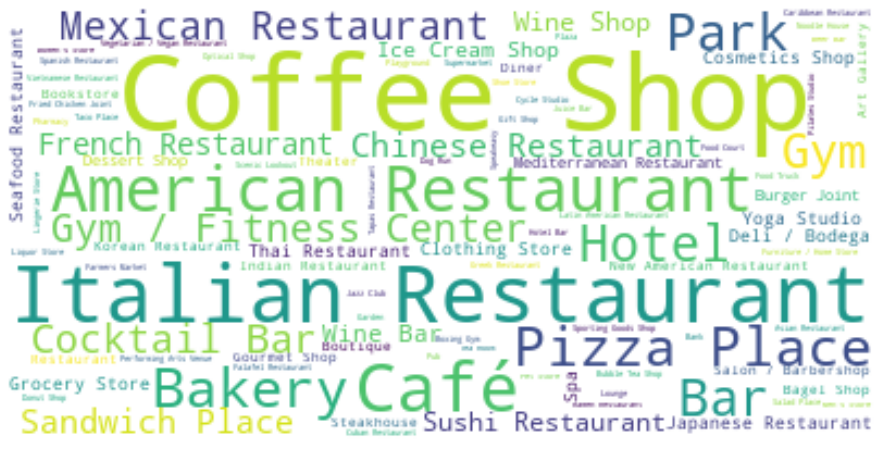

In [103]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud.generate_from_frequencies(frequencies=manhattan)
plt.figure()
plt.figure(figsize=[16,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [104]:
#exporting the file for the report
wordcloud.to_file("manhattan_venues.png")

In [105]:
sf_venue_count = sf_venues \
    .groupby('Venue Category', as_index = False) \
    .agg({'Venue': 'count'}) \
    .rename(columns = {'Venue': 'Venue Count'}) \
    .sort_values('Venue Count', ascending = False) \
    .rename(columns = {'Venue Count' : 'SF Venue Count'}) \
    .reset_index(drop = True)

In [106]:
sf_venue_count.head(20)

,Venue Category,SF Venue Count
0,Coffee Shop,52
1,Pizza Place,27
2,Mexican Restaurant,24
3,Sushi Restaurant,24
4,Café,23
5,Bakery,21
6,Italian Restaurant,21
7,Park,20
8,Hotel,16
9,Gym / Fitness Center,16


<h2>Visualize the most common venues in SF</h2>

In [107]:
sf = {}
for category, count in sf_venue_count.values:
    sf[category] = count

(-0.5, 399.5, 199.5, -0.5)

<Figure size 432x288 with 0 Axes>

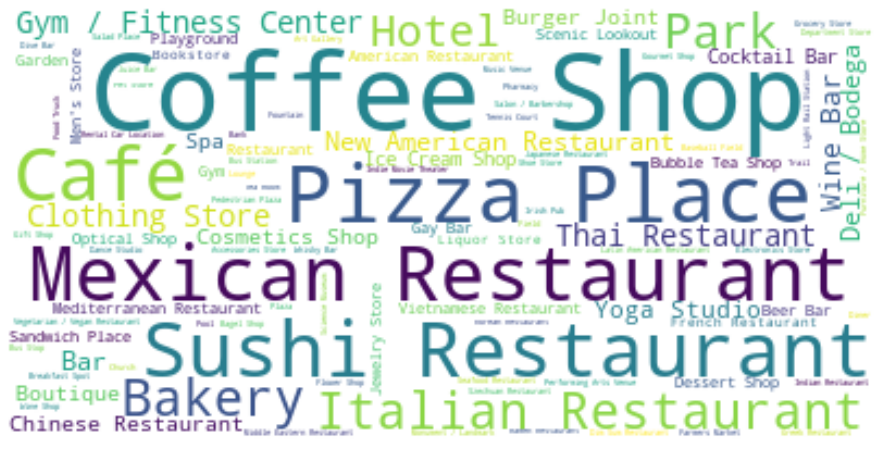

In [108]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud.generate_from_frequencies(frequencies=sf)
plt.figure()
plt.figure(figsize=[16,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [109]:
#exporting the file for the report
wordcloud.to_file("sf_venues.png")

The next step will be to compare the venue categories in both cities and check what we will miss in both of these cities. To do it, we will merge the two datasets with bvenues in each city and see what venues are missing.

In [110]:
venues_comparison = manhattan_venue_count.merge(sf_venue_count, how = 'outer', on='Venue Category')

In [111]:
venues_comparison.head()

,Venue Category,Manhattan Venue Count,SF Venue Count
0,Coffee Shop,139.0,52.0
1,Italian Restaurant,129.0,21.0
2,Café,86.0,23.0
3,American Restaurant,77.0,10.0
4,Pizza Place,76.0,27.0


In [112]:
venues_missing_manhattan = venues_comparison[venues_comparison[['Manhattan Venue Count']].isnull().any(axis=1)]

In [113]:
venues_missing_manhattan_list = venues_missing_manhattan['Venue Category'].to_list()

In [114]:
print(venues_missing_manhattan_list, end = '')

['Science Museum', 'Bus Stop', 'Church', 'Light Rail Station', 'Field', 'Brewery', 'Motel', 'Road', 'Neighborhood', 'College Gym', 'Lake', 'Comic Shop', 'Track', 'Storage Facility', 'Planetarium', 'Street Food Gathering', 'Sicilian Restaurant', 'Skating Rink', 'Tanning Salon', 'Tuscan Restaurant', 'Souvlaki Shop', 'ATM', 'Physical Therapist', 'Cultural Center', 'Car Wash', 'Business Service', 'Bus Line', 'Burmese Restaurant', 'Botanical Garden', 'Aquarium', 'Gluten-free Restaurant', 'Parking', 'Pakistani Restaurant', 'Nabe Restaurant', 'Music Store', 'Mountain', 'Motorcycle Shop', 'Metro Station', 'Marijuana Dispensary', 'Hill', 'Herbs & Spices Store']

Some venue categories are missing because we analyzed Manhattan only and not the entire New York. In addition, some venues missing in New York are probably due to the limits in Foursquare API calls (as there are ATMs, Churches, Bus stops, Road, lakes, Physical Therapists, parkings and car washes in Manhattan). However, there are a few distinct categories that are missing in Manhattan, such as Nabe Restaurant, Planetarium, Skating Rink(that will change is we run this research in winter), Burmese Restaurant and a few others).

In [115]:
venues_missing_sf = venues_comparison[venues_comparison[['SF Venue Count']].isnull().any(axis=1)]

In [116]:
venues_missing_sf_list = venues_missing_sf['Venue Category'].to_list()

In [117]:
print(venues_missing_sf_list, end = '')

['Speakeasy', 'Caribbean Restaurant', 'Cuban Restaurant', 'Fried Chicken Joint', 'Food Court', 'Snack Place', 'Turkish Restaurant', 'Hotpot Restaurant', 'Boat or Ferry', 'Rock Club', 'Smoke Shop', 'Filipino Restaurant', 'School', 'Memorial Site', 'Residential Building (Apartment / Condo)', 'Hawaiian Restaurant', 'Australian Restaurant', 'Tattoo Parlor', 'Supplement Shop', 'Malay Restaurant', 'Office', 'Pet Café', 'Pet Service', 'Video Game Store', 'Tailor Shop', 'Bike Rental / Bike Share', 'Flea Market', 'Bistro', 'Bridal Shop', 'Bridge', 'Discount Store', 'Design Studio', 'Club House', 'Israeli Restaurant', 'Kebab Restaurant', 'Cooking School', 'Shopping Mall', 'Bike Trail', 'Skate Park', 'Soup Place', 'Soccer Field', 'Taiwanese Restaurant', 'Creperie', 'College Theater', 'Record Shop', 'Paella Restaurant', 'Climbing Gym', 'Sports Club', 'Udon Restaurant', 'Lebanese Restaurant', 'Library', 'Karaoke Bar', 'Wings Joint', 'Hobby Shop', 'Heliport', 'Hardware Store', 'Used Bookstore', 'Ath

Looking at the missing venues in San Francisco we see a lot of various cuisines that we can enjoy in Manhattan, New York, but cannot find in San Francisco. 
If some of these venue categories are popular in New York, business owners might consider opening these types of venues in San Francisco as well to offer more diversity in the city and expand options for people living and traveling there. 